In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('carprice.csv')





In [3]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


## Linear regression

In [4]:
lr= LinearRegression()

In [5]:
x = df[['highwaympg']]
y = df[['price']]

In [6]:
lr.fit(x,y)

LinearRegression()

In [10]:
# predicting value of a particular quantity (exclusive quantities too)
# lr.predict(np.array(30.0).reshape(-1,1))
lr.predict([[30]])

array([[13884.65263588]])

In [8]:
yhat = lr.predict(x)

In [9]:
lr.intercept_

38162.85848448241

In [10]:
lr.coef_

array([-809.27352829])

<AxesSubplot:xlabel='highwaympg', ylabel='price'>

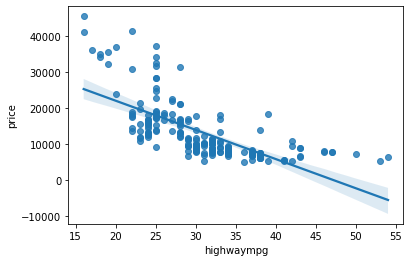

In [11]:
sns.regplot(x = x, y =y ,data = df)

#plt.ylim(0,)

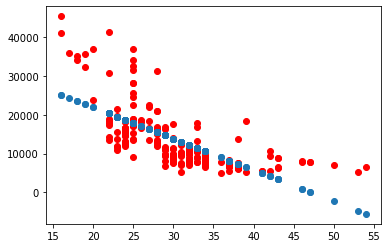

In [12]:
plt.scatter(x,y,color='r')
plt.scatter(x,yhat)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='highwaympg', ylabel='price'>

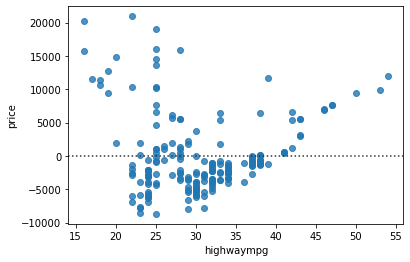

In [13]:
# Residual plot 
sns.residplot(x,y)


<span style="color:brown">a non linear curve can be seen on the middle right of the graph that means our model is not that effective</span> 

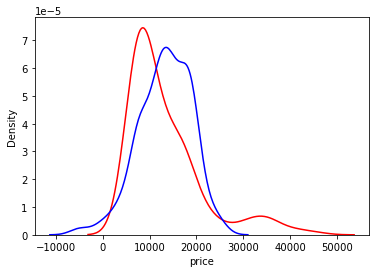

In [14]:
# distribution plots to compare actual and predicted values
ax1 =  sns.kdeplot(df['price'],color ='r',label ='actual value')
sns.kdeplot(yhat, color='b',label ='Fitted values',ax =ax1)
plt.show()

### Multiple linear regression

In [15]:
x = df[['highwaympg','horsepower','curbweight','enginesize']]
y = df['price']

In [16]:
lr.fit(x,y)
yhat = lr.predict(x)

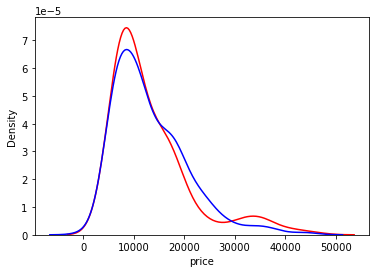

In [17]:
# distribution plots to compare actual and predicted values
ax1 =  sns.kdeplot(df['price'],color ='r',label ='actual value')
sns.kdeplot(yhat, color='b',label ='Fitted values',ax =ax1)
plt.show()

# polynomial Regression 

In [18]:
x = df['highwaympg']
y = df['price']

f = np.polyfit(x,y,3)
p = np.poly1d(f)
p

poly1d([-1.49603403e+00,  1.97860523e+02, -8.71437435e+03,  1.35089693e+05])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [20]:
from sklearn.preprocessing import PolynomialFeatures
pr =PolynomialFeatures(degree =2, include_bias =False)
x_polly = pr.fit_transform(df[['horsepower','curbweight']])


## normalisation



In [21]:
# for restricting values in certain range
from sklearn.preprocessing import StandardScaler
Scale = StandardScaler()
Scale.fit(df[['horsepower','highwaympg']])
x_scale =Scale.transform(df[['horsepower','highwaympg']])


## Pipeline


In [22]:
from sklearn.pipeline import Pipeline

In [23]:
Input = [('scale',StandardScaler()),('polynomial',PolynomialFeatures(degree =2)),('model',LinearRegression())]

In [24]:
pipe = Pipeline(Input)

### multiple polynomial regression

In [25]:
x =df[['horsepower','curbweight','enginesize','highwaympg']]
z=df['horsepower']
# x can be all of them but it will not create a graph with that
y= df['price']

In [26]:
x.count()

horsepower    205
curbweight    205
enginesize    205
highwaympg    205
dtype: int64

In [27]:
y.count()

205

In [28]:
pipe.fit(df[['horsepower','curbweight','enginesize','highwaympg']],y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures()),
                ('model', LinearRegression())])

In [29]:
yhat = pipe.predict(df[['horsepower','curbweight','enginesize','highwaympg']])

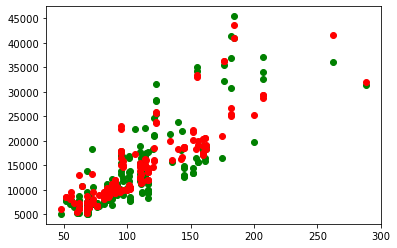

In [30]:
plt.scatter(z, y,color= "green", marker ="o")
plt.scatter(z, yhat,color= "red", marker ="o")  # pridicted

### test train split


In [31]:
from sklearn.model_selection import train_test_split 

In [32]:
z_train ,z_test , y_train, y_test = train_test_split(z,y,test_size =0.33, random_state =1)

In [33]:
z_train = np.array(z_train).reshape(-1,1)
z_test = np.array(z_test).reshape(-1,1)

In [34]:
model = lr.fit(z_train,y_train)

In [35]:
y_pred = model.predict(z_test)

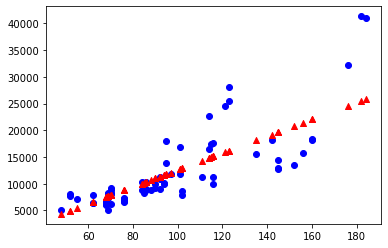

In [36]:
plt.scatter(z_test, y_test , c="b")
plt.scatter(z_test, y_pred , c="r",marker ="^")
plt.show()

### cross validation

In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import statistics

In [38]:
z = np.array(z).reshape(-1,1)


In [39]:
scores = cross_val_score(lr,z,y,cv=3)  # cv => folds (week 5 v1)
mean_scores = statistics.mean(scores)
mean_scores

0.5339189347090497

In [40]:
yhat = cross_val_predict(lr,z,y,cv=5) #taking k folds = cv=___
mean_yhat = statistics.mean(yhat)

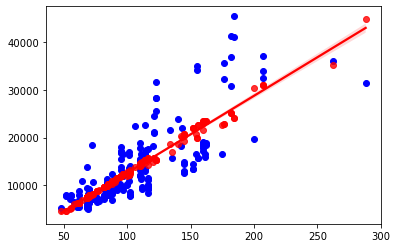

In [41]:
plt.scatter(z,y , c="b")
#plt.scatter(z, yhat, c="r",marker ="^")
#plt.scatter(z, mean_yhat, c="green",marker ="^")

sns.regplot(x = z, y =np.array(yhat) ,data = df,color ='red')


plt.show()

## under and over fitting

In [42]:
y = y.astype('int')

In [43]:
z_train ,z_test , y_train, y_test = train_test_split(z,y,test_size =0.33, random_state =1)

In [44]:
df[['horsepower']]

,horsepower
0,111
1,111
2,154
3,102
4,115
...,...
200,114
201,160
202,134
203,106


In [45]:
Rsquare =[]
order = [1,2,3,4,5,6,7,8,9,10,11,12,13]
for n in order:
    pr = PolynomialFeatures(degree = n)
    z_train_pr = pr.fit_transform(z_train)
    z_test_pr = pr.fit_transform(z_test)
    lr.fit(z_train_pr,y_train)
    
    Rsquare.append(lr.score(z_test_pr,y_test))
    
#w5 v2 last seconds

In [46]:
Rsquare

[0.6366383573323964,
 0.6313856782961902,
 0.6534667543172494,
 0.6588539411563816,
 0.6619321349893471,
 0.6790054063281699,
 0.681604689794221,
 0.6751109456053022,
 0.6757510326224327,
 0.6525507665603282,
 0.6276184162607725,
 0.6008508661376131,
 0.5805305640099984]

In [47]:
max(Rsquare)
# for Rsquare = 1 model is absolute accurate

0.681604689794221

In [48]:
b=0
for a in Rsquare :

    if(a == max(Rsquare)):
        break
    b= b+1
print("{} is the most effictive degree for this model".format(b+1))

7 is the most effictive degree for this model


## Ridge regression


#####  for linear regression

Ridge and Lasso regression are powerful techniques generally powerfull than linear used for creating cheap(kanjoos to use resources) models in presence of a ‘large’ number of features.

In [49]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
ridgemodel = Ridge(alpha =0.1)
ridgemodel.fit(z,y)
yhat = ridgemodel.predict(z)

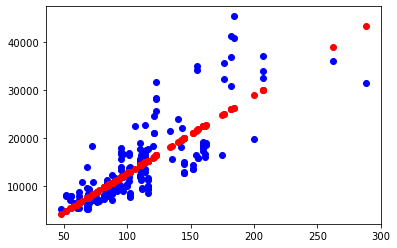

In [50]:
plt.scatter(z,y,c='b')
plt.scatter(z,yhat,c='r')

In [51]:
z_train ,z_test , y_train, y_test = train_test_split(z,y,test_size =0.33, random_state =1)

Rsquare =[]

alphas =[0.01,0.1,1,10]   #ranging significance of some coefficients
for a in alphas :
    ridgemodel = Ridge(alpha = a)
    ridgemodel.fit(z_train,y_train)
    yhat = ridgemodel.predict(z_test)
    Rsquare.append(ridgemodel.score(z,y))
Rsquare

[0.6523434287681427, 0.652343413601151, 0.6523432619222875, 0.6523417442390345]

### Grid search CV

In [52]:
from sklearn.model_selection import GridSearchCV

parameters1 =[{'alpha':[0.001,0.1,1,10,100,1000,10000,100000,1000000]}]
RR = Ridge()

grid1 = GridSearchCV(RR,parameters1,cv =4)

grid1.fit(x[['horsepower','curbweight','enginesize','highwaympg']],y)

grid1.best_estimator_

Ridge(alpha=10000)

In [62]:
for paramater ,mean_val ,mean_test in zip(scores['params'],scores['mean_test_score'],scores['mean_train_score']):
    print(paramater ,'   R^2 on test data:',mean_val,"   R^2 on train data:",mean_test)

{'alpha': 0.001}    R^2 on test data: 0.6836720386658424    R^2 on train data: 0.8179280515616572
{'alpha': 0.1}    R^2 on test data: 0.6836722926331922    R^2 on train data: 0.8179280515603112
{'alpha': 1}    R^2 on test data: 0.6836745999745444    R^2 on train data: 0.8179280514271624
{'alpha': 10}    R^2 on test data: 0.6836975303257324    R^2 on train data: 0.817928038227623
{'alpha': 100}    R^2 on test data: 0.6839133763129503    R^2 on train data: 0.8179268253159696
{'alpha': 1000}    R^2 on test data: 0.6852475014303049    R^2 on train data: 0.8178642681274628
{'alpha': 10000}    R^2 on test data: 0.6869422151366709    R^2 on train data: 0.8168521854044446
{'alpha': 100000}    R^2 on test data: 0.6690158519930138    R^2 on train data: 0.795189704800399
{'alpha': 1000000}    R^2 on test data: 0.6115506600469858    R^2 on train data: 0.726041917862772


In [57]:
scores = grid1.cv_results_
print(scores['mean_test_score'])

[0.68367204 0.68367229 0.6836746  0.68369753 0.68391338 0.6852475
 0.68694222 0.66901585 0.61155066]


In [58]:
parameters = [{'alpha':[1,10,100,1000], 'normalize' :[True, False]} ]
# 4*2 = 8
RR = Ridge()

grid1 = GridSearchCV(RR,parameters1,cv =4,return_train_score=True)

grid1.fit(x[['horsepower','curbweight','enginesize','highwaympg']],y)

grid1.best_estimator_

Ridge(alpha=10000)

In [66]:
x_data=df.drop('price',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x_data, y, test_size=0.10, random_state=1)

In [69]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curbweight', 'enginesize', 'highwaympg']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curbweight', 'enginesize', 'highwaympg']])

In [70]:
RigeModel=Ridge(alpha=1)

In [71]:
RigeModel.fit(x_train_pr, y_train)
yhat = RigeModel.predict(x_test_pr)

In [72]:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [6275.57261577 6594.59431323 6151.59531064 6420.86777696]
test set : [6669 7999 6338 8916]


In [73]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|████████████████████████████████████████| 1000/1000 [00:04<00:00, 228.53it/s, Test Score=0.879, Train Score=0.833]


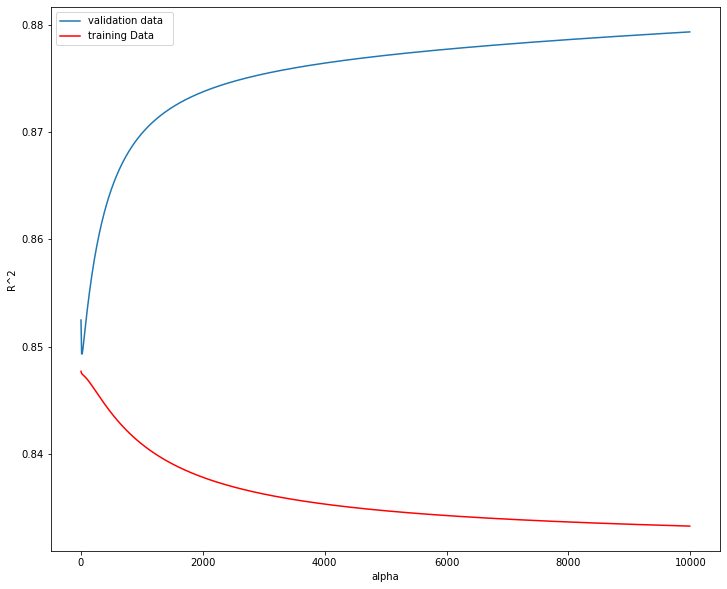

In [74]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()